# k-NN classifier - Small PCA dataset

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/reduced/small/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'PCA_train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35187 entries, 0 to 35186
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         35187 non-null  float64
 1   1         35187 non-null  float64
 2   phishing  35187 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 824.8 KB


,0,1,phishing
0,228987.058114,-7577.447893,1
1,-18079.501237,-4591.866489,1
2,-7855.407037,-4726.854052,1
3,229855.757883,5730.655682,1
4,-19920.590656,-4432.011638,0


In [4]:
valid_data = pd.read_csv(DATA_DIR + 'PCA_valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         11729 non-null  float64
 1   1         11729 non-null  float64
 2   phishing  11729 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 275.0 KB


,0,1,phishing
0,-19913.487308,-4573.678818,1
1,-18080.461643,-4663.846316,0
2,-19152.980778,-1755.291659,0
3,13510.492490,6797.767366,1
4,-4298.720730,-1475.949864,0


In [5]:
test_data = pd.read_csv(DATA_DIR + 'PCA_test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   0         11729 non-null  float64
 1   1         11729 non-null  float64
 2   phishing  11729 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 275.0 KB


,0,1,phishing
0,18815.156711,-1661.175732,1
1,-33252.125551,-4689.002127,1
2,-14168.852892,-2852.311369,0
3,-16619.548133,16682.891987,1
4,21832.273241,1944.771778,0


## Get X and y data

In [6]:
TARGET_COL_NAME = 'phishing'

In [7]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [8]:
y_train.value_counts()

1    18388
0    16799
Name: phishing, dtype: int64

In [9]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [10]:
y_valid.value_counts()

1    6129
0    5600
Name: phishing, dtype: int64

In [11]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [12]:
y_test.value_counts()

1    6130
0    5599
Name: phishing, dtype: int64

## Hyperparameter tuning

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
neighbors_cnts = [1, 3, 5, 10, 20, 30]

for neighbors_cnt in neighbors_cnts:
    print('Neighbors count: {}'.format(neighbors_cnt))

    clf = KNeighborsClassifier(n_neighbors=neighbors_cnt, n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_valid)

    print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
          .format(accuracy_score(y_valid, y_pred),
                  balanced_accuracy_score(y_valid, y_pred),
                  f1_score(y_valid, y_pred),
                  precision_score(y_valid, y_pred),
                  recall_score(y_valid, y_pred)))
    print('-' * 20)

Neighbors count: 1
Validation data - Accuracy: 0.791, Balanced accuracy: 0.790, F1: 0.801, Precision: 0.796, Recall: 0.806
--------------------
Neighbors count: 3
Validation data - Accuracy: 0.785, Balanced accuracy: 0.784, F1: 0.797, Precision: 0.787, Recall: 0.809
--------------------
Neighbors count: 5
Validation data - Accuracy: 0.774, Balanced accuracy: 0.773, F1: 0.788, Precision: 0.772, Recall: 0.805
--------------------
Neighbors count: 10
Validation data - Accuracy: 0.758, Balanced accuracy: 0.758, F1: 0.766, Precision: 0.775, Recall: 0.756
--------------------
Neighbors count: 20
Validation data - Accuracy: 0.748, Balanced accuracy: 0.748, F1: 0.761, Precision: 0.756, Recall: 0.765
--------------------
Neighbors count: 30
Validation data - Accuracy: 0.740, Balanced accuracy: 0.739, F1: 0.754, Precision: 0.746, Recall: 0.763
--------------------


## Retrain the best model - training + validation dataset

In [14]:
best_neighbors_cnt = 1

In [15]:
X_train_and_valid = pd.concat([X_train, X_valid])
X_train_and_valid.shape

(46916, 2)

In [16]:
y_train_and_valid = pd.concat([y_train, y_valid])
y_train_and_valid.shape

(46916,)

In [17]:
best_clf = KNeighborsClassifier(n_neighbors=best_neighbors_cnt, n_jobs=-1)

best_clf.fit(X_train_and_valid, y_train_and_valid)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

## Save trained model

In [18]:
from joblib import dump

dump(best_clf, "../../models/knn_pca_small_model.pkl") 

['../../models/knn_pca_small_model.pkl']

## Evaluate on test data

In [19]:
from sklearn.metrics import matthews_corrcoef, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [20]:
y_pred = best_clf.predict(X_test)

Metric values:

F1: 0.818
Accuracy: 0.808
Balanced accuracy: 0.807
MCC: 0.616
Precision: 0.811
Recall: 0.825
FPR: 0.211




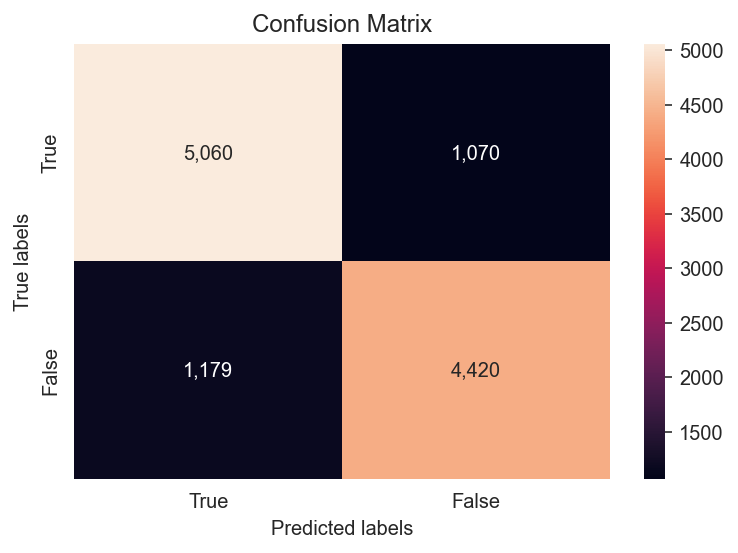

In [21]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)